# Importing initial libraries 

In [2]:
import numpy as np
import pandas as pd
import cv2 as cv
import matplotlib.pyplot as plt
import os

# Importing the data/images
## Importing the labels 
Before being able to import the data/images, I need to import the csv file containing all the data about the location and description of the images.

In [4]:
df = pd.read_csv("data/labels.csv")

# Check for the head of the dataframe
df.head()

,ClassId,Name
0,0,Speed limit (5km/h)
1,1,Speed limit (15km/h)
2,2,Speed limit (30km/h)
3,3,Speed limit (40km/h)
4,4,Speed limit (50km/h)


## Exploring and cleaning the dataframe
Before I can utilise the data provided in the dataframe, I am going to look whether I can use all the values provided by the authors of the dataset in this csv file.

In [6]:
# Checking for unique values in "Name"
df.Name.unique()

array(['Speed limit (5km/h)', 'Speed limit (15km/h)',
       'Speed limit (30km/h)', 'Speed limit (40km/h)',
       'Speed limit (50km/h)', 'Speed limit (60km/h)',
       'Speed limit (70km/h)', 'speed limit (80km/h)',
       'Dont Go straight or left', 'Dont Go straight or Right',
       'Dont Go straight', 'Dont Go Left', 'Dont Go Left or Right',
       'Dont Go Right', 'Dont overtake from Left', 'No Uturn', 'No Car',
       'No horn', 'Go straight or right', 'Go straight', 'Go Left',
       'Go Left or right', 'Go Right', 'keep Left', 'keep Right',
       'Roundabout mandatory', 'watch out for cars', 'Horn',
       'Bicycles crossing', 'Uturn', 'Road Divider', 'Traffic signals',
       'Danger Ahead', 'Zebra Crossing', 'Children crossing',
       'Dangerous curve to the left', 'Dangerous curve to the right',
       'Unknown1', 'Unknown2', 'Unknown3', 'Go right or straight',
       'Go left or straight', 'Unknown4', 'ZigZag Curve',
       'Train Crossing', 'Under Construction', 'Unkn

In [7]:
# There are a few "Unknown" labels, which must be removed
df = df.loc[~df['Name'].str.contains("Unknown")]
df.Name.unique()

array(['Speed limit (5km/h)', 'Speed limit (15km/h)',
       'Speed limit (30km/h)', 'Speed limit (40km/h)',
       'Speed limit (50km/h)', 'Speed limit (60km/h)',
       'Speed limit (70km/h)', 'speed limit (80km/h)',
       'Dont Go straight or left', 'Dont Go straight or Right',
       'Dont Go straight', 'Dont Go Left', 'Dont Go Left or Right',
       'Dont Go Right', 'Dont overtake from Left', 'No Uturn', 'No Car',
       'No horn', 'Go straight or right', 'Go straight', 'Go Left',
       'Go Left or right', 'Go Right', 'keep Left', 'keep Right',
       'Roundabout mandatory', 'watch out for cars', 'Horn',
       'Bicycles crossing', 'Uturn', 'Road Divider', 'Traffic signals',
       'Danger Ahead', 'Zebra Crossing', 'Children crossing',
       'Dangerous curve to the left', 'Dangerous curve to the right',
       'Go right or straight', 'Go left or straight', 'ZigZag Curve',
       'Train Crossing', 'Under Construction', 'Fences',
       'Heavy Vehicle Accidents', 'Give Way', 'No 

## Getting the images
Now that all the labels have a distinct and meaningful description, I can now import the images.

In [9]:
train_dataset = []
IMG_SIZE = 64

train_path = "data/traffic_Data/DATA/"
classIDs = df.ClassId

for i in range(0, int(df.iloc[-1].ClassId)):
    if i in classIDs:
        folder = train_path + str(i)
        for filename in os.listdir(folder):
            img = cv.imread(os.path.join(folder, filename))
            if img is not None:
                img = cv.resize(img, (IMG_SIZE, IMG_SIZE))
                img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
                img = img/255.0
                train_dataset.append([img, i])

In [10]:
test_dataset = []

test_path = "data/traffic_Data/TEST/"
classIDs = df.ClassId

for i in range(0, int(df.iloc[-1].ClassId)):
    if i in classIDs:
        folder = test_path + str(i)
        for filename in os.listdir(folder):
            img = cv.imread(os.path.join(folder, filename))
            if img is not None:
                img = cv.resize(img, (IMG_SIZE, IMG_SIZE))
                img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
                img = img/255.0
                test_dataset.append([img, i])

## Randomising the dataset 
This will make suret hat my neural network is not going to overfit for one specific class.

In [12]:
import random 
random.shuffle(test_dataset)
random.shuffle(train_dataset)

# Training the Naive Bayes model
Now that I have imported the images with which I am going to train my model with, I am going to have to build a neural network.
## Importing machine learning library - Naive Bayes from sklearn

In [14]:
from sklearn.naive_bayes import GaussianNB

In [15]:
x = []
y = []

## Splitting dataset into x and y
for item in train_dataset:
    x.append(item[0].flatten())
    y.append(item[1])

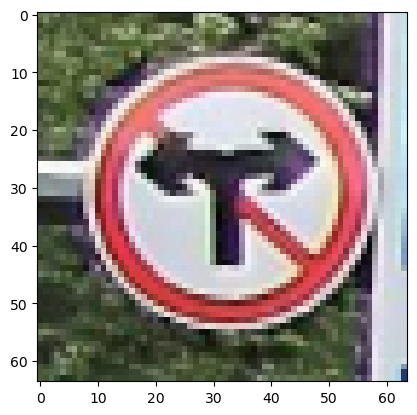

'Dont Go Left or Right'

In [16]:
plt.imshow(train_dataset[0][0])
plt.show()
df.Name[y[0]]

In [17]:
model = GaussianNB()
model.fit(x, y) # Training the model

GaussianNB()

In [18]:
from sklearn.metrics import accuracy_score

In [19]:
x_test = []
y_test = []

# Splitting the training data into x and y
for item in test_dataset:
    x_test.append(item[0].flatten())
    y_test.append(item[1])

In [20]:
y_pred = model.predict(x_test)
acc = accuracy_score(y_test, y_pred) # Calculating the model's accuracy

In [21]:
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 22.53%


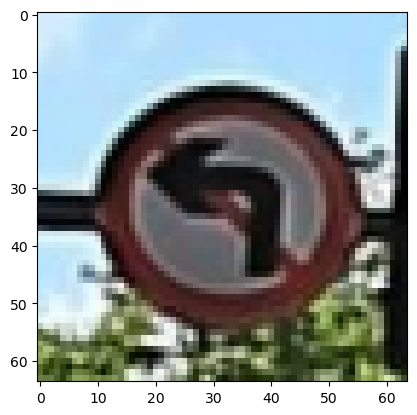

11

In [22]:
plt.imshow(test_dataset[1][0])
plt.show()
y_test[1]

In [23]:
p = model.predict([test_dataset[1][0].flatten()])
df.Name[p]

11    Dont Go Left
Name: Name, dtype: object